In [359]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import math
seeds = pd.read_csv('seeds.csv')

In [360]:
seeds.head(3)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1


In [361]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [362]:
seeds.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


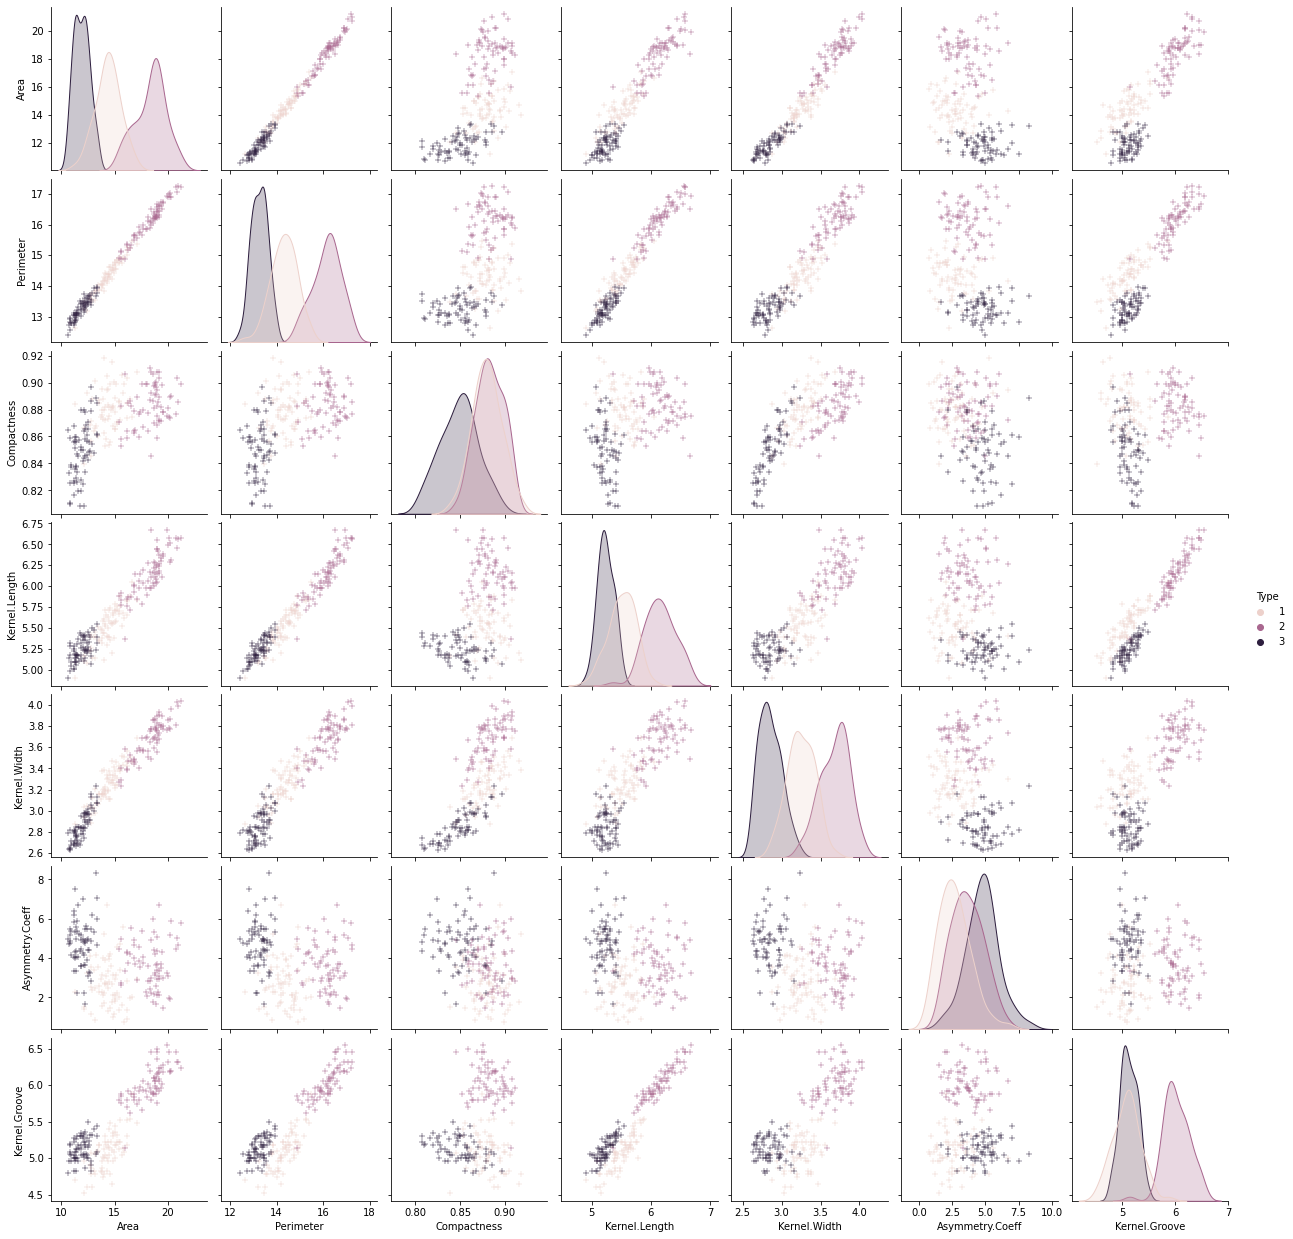

In [363]:
sns.pairplot(seeds,hue='Type',markers = '+')

In [364]:
class ProcessingData:
    
    @staticmethod
    def shuffleData(base):
        for x in range(len(base)-1,0,-1):
            newPlace = random.randint(0,x-1)
            base.loc[x],base.loc[newPlace]=base.loc[newPlace],base.loc[x]
            
    @staticmethod
    def normalizeData(base):
        base.iloc[:,:-1] = (base.iloc[:,:-1]-base.iloc[:,:-1].min())/(base.iloc[:,:-1].max()-base.iloc[:,:-1].min())

    @staticmethod
    def splitData(base,x,y):
        n = int(len(base)*x/100)
        base_tren = base[:n]
        base_valid = base[n:]
        return(base_tren,base_valid)

In [365]:
seedsEdit = seeds.copy()

ProcessingData.shuffleData(seedsEdit)
ProcessingData.normalizeData(seedsEdit)
trening_data,validate_data = ProcessingData.splitData(seedsEdit,70,30)

In [366]:
trening_data.head(3)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,0.783758,0.789256,0.841198,0.747748,0.811832,0.380654,0.712457,2
1,0.030217,0.080579,0.264065,0.106419,0.032074,0.452178,0.215165,3
2,0.590179,0.673554,0.491833,0.618806,0.608696,0.517874,0.668636,2


In [367]:
validate_data.head(3)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
139,0.337110,0.411157,0.456443,0.427365,0.355666,0.305554,0.323486,1
140,0.147309,0.214876,0.328494,0.291667,0.147541,0.380522,0.403250,3
141,0.593012,0.669421,0.514519,0.698198,0.593728,0.388204,0.712949,2


In [368]:
class Bayes:
    
    @staticmethod
    def recoverTreningData(data):
        sortedData = []
        sort = data.groupby(data.Type)
        sortedData.append(sort.get_group(1))
        sortedData.append(sort.get_group(2))
        sortedData.append(sort.get_group(3))

        return sortedData

    @staticmethod
    def meanMaker(sortedData):
        meanTable = []
        for j in range(len(sortedData)):
            meanTable.append(sortedData[j].loc[:,sortedData[j].columns != "Type"].mean(numeric_only=True).tolist())
        return meanTable

    @staticmethod
    def standardDeviation(sortedData):
        deviationTable = []
        for j in range(len(sortedData)):
            deviationTable.append(sortedData[j].loc[:,sortedData[j].columns != "Type"].std(numeric_only=True).tolist())
        return deviationTable

    @staticmethod
    def gauss(validate_data,meanTable,deviationTable):
        correct = 0
        varieties = [1,2,3]
        for i in range(len(validate_data)):
            trueName = int(validate_data.iloc[i].Type)
            points = []
            for j in range(len(sortedData)):
                g = 1
                for k in range(0,len(sortedData[j].columns)-1):
                    x = validate_data.iloc[i][k]
                    u = meanTable[j][k]
                    ro = deviationTable[j][k]

                    if x < (u - (6**(1/2))*ro):
                        g *= 0

                    elif (u - (6**(1/2))*ro)<= x <= u:
                        g *= ((x - u)/(6*(ro**2))) + 1/((6**(1/2))*ro)

                    elif u < x <= (u + (6**(1/2))*ro):
                        g *= (-(x - u)/(6*(ro**2))) + 1/((6**(1/2))*ro)

                    elif x > (u + (6**(1/2))*ro):
                        g *= 0
                points.append(g)
            guessedName = varieties[np.argmax(points)]

            if guessedName == trueName:
                correct+=1
        return "Accuracy {:.2f}% => {}/{}".format(correct*100/len(validate_data),correct,len(validate_data))

In [369]:
sortedData = Bayes.recoverTreningData(trening_data)
meanTable = Bayes.meanMaker(sortedData)
deviationTable = Bayes.standardDeviation(sortedData)
Bayes.gauss(validate_data,meanTable,deviationTable)

'Accuracy 91.67% => 55/60'